In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import VisualDataMaker
import CNNRegressAndSoftmax as CRS
import tensorflow as tf

In [2]:
data, OHE_LABELS = VisualDataMaker.combine("./random_BG_IMG/n_data/*.jpg", "./original_DOB_images/*.png")
bounded_DOB = VisualDataMaker.plot_bounding_box(data)

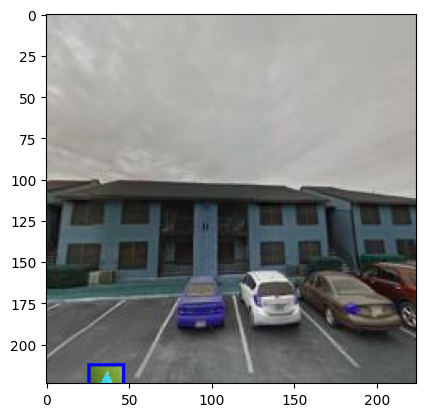

In [3]:
plt.imshow(bounded_DOB[2099][0])
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, BatchNormalization

def fit(input):
    output = Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu')(input)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2))(output)
    output = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2))(output)
    return output


In [5]:
batch = []
truth = []
for i in range(len(bounded_DOB)):
    batch.append(bounded_DOB[i][0])
    

In [6]:
batch = np.array(batch)

In [7]:
batch.shape

(2300, 224, 224, 3)

In [8]:
batch = tf.keras.backend.constant(batch)

In [9]:
input = Input((224, 224, 3))
x = CRS.convolutional_block(input)
box_output = CRS.regression_block_forward(x)
class_output = CRS.classification_block_forward(x)
model = keras.Model(inputs=input, outputs = [class_output, box_output])

In [10]:
pc, pb = model.predict(batch[:3])

1/1 [==============================] - 0s 228ms/step


In [28]:
OHES = []
for classification in pc:
    OHE = [0]*len(OHE_LABELS)
    label = max(classification)
    classification = list(classification)
    label_index = classification.index(label)
    OHE[label_index] = 1
    OHES.append(OHE)

In [18]:
pc

array([[1.4107452e-09, 1.1611245e-06, 3.9782385e-15, 2.0959921e-23,
        8.6828526e-13, 9.9999881e-01],
       [4.6420760e-07, 9.9999952e-01, 1.2614238e-17, 8.7546540e-23,
        1.6304251e-09, 2.7526102e-08],
       [8.0075798e-12, 7.9407570e-14, 3.2909284e-15, 9.2298373e-25,
        4.9839450e-27, 1.0000000e+00]], dtype=float32)

In [29]:
class_predictions = []
for label in OHES:
    for k,v in OHE_LABELS.items():
        if label == v:
            class_predictions.append(k)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] ./original_DOB_images\CircleArtificial.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] ./original_DOB_images\CircleNatural.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] ./original_DOB_images\DoorArtificial.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] ./original_DOB_images\DoorNatural.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] ./original_DOB_images\Square Natural.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] ./original_DOB_images\SquareArtificial.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ./original_DOB_images\TrapezoidArtificial.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ./original_DOB_images\TrapezoidNatural.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 0] ./original_DOB_images\TriangleArtificial.png
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 